<a href="https://colab.research.google.com/github/drskprabhakar/AI-ML-DL-colab-notebooks-coding-models/blob/main/df_df1_df2_df3_df4_df5_df6_all_outliers_removed_SIA_android_app_vs_SIA_calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_excel("/content/drive/MyDrive/corrected SIA app and SIA calculator magnitude axis.xlsx")


In [3]:
df.shape

(107, 4)

In [4]:
df.head()

,appmagnitude,calculatormagnitude,appaxis,calculatoraxis
0,0.36,1.04,1.290,105
1,2.07,3.42,4.010,68
2,2.47,1.75,0.076,155
3,0.51,1.47,1.640,50
4,0.71,1.26,0.629,141


In [5]:
df.tail()

,appmagnitude,calculatormagnitude,appaxis,calculatoraxis
102,0.170,0.49,0.328,59
103,0.530,1.00,0.921,84
104,1.056,0.83,0.654,83
105,1.247,1.65,1.508,87
106,0.530,0.56,0.330,33


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   appmagnitude         107 non-null    float64
 1   calculatormagnitude  107 non-null    float64
 2   appaxis              107 non-null    float64
 3   calculatoraxis       107 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 3.5 KB


In [7]:
df.describe()

,appmagnitude,calculatormagnitude,appaxis,calculatoraxis
count,107.000000,107.000000,107.000000,107.000000
mean,1.314382,1.490467,1.515748,91.728972
std,1.638689,1.096741,1.854832,37.272725
min,0.000000,0.170000,0.000000,1.000000
25%,0.353500,0.785000,0.497000,64.000000
50%,0.870000,1.260000,1.060000,88.000000
75%,1.580000,1.865000,1.889500,119.500000
max,9.000000,6.530000,15.710000,179.000000


<Axes: >

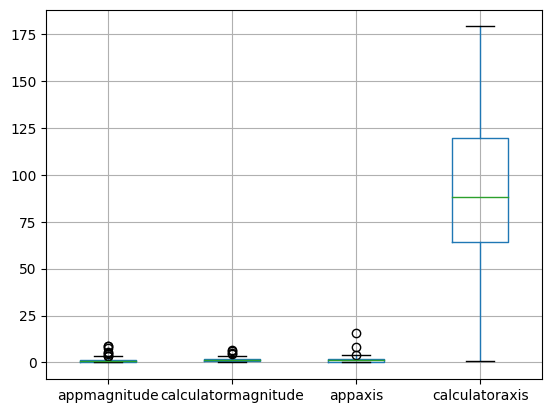

In [8]:
df.boxplot()

<Axes: >

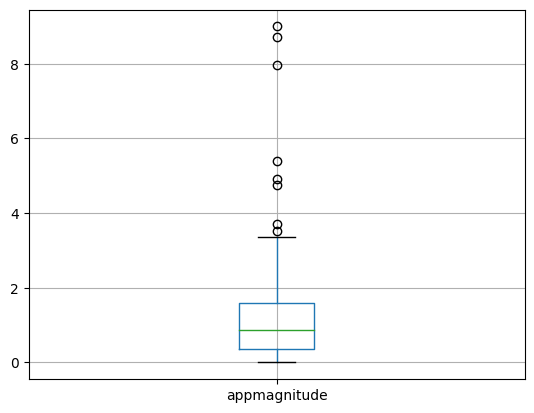

In [9]:
df.boxplot("appmagnitude")

<Axes: >

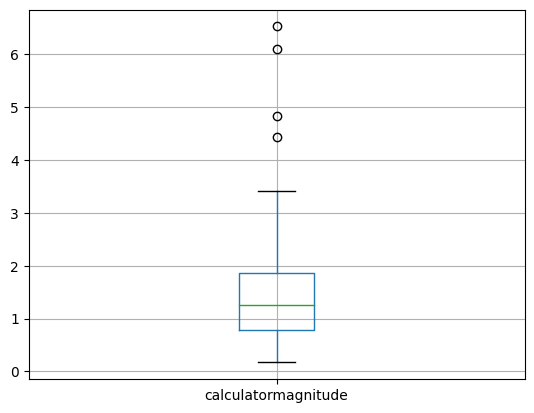

In [10]:
df.boxplot("calculatormagnitude")

<Axes: >

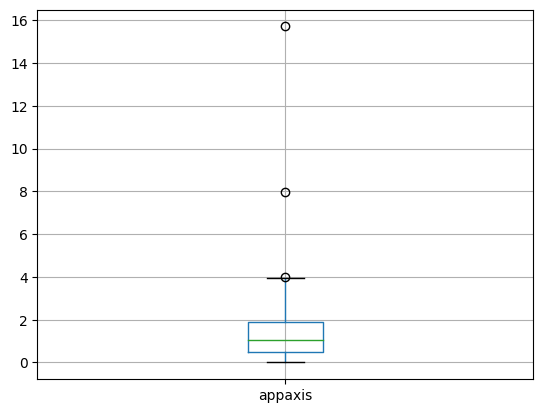

In [11]:
df.boxplot('appaxis')

<Axes: >

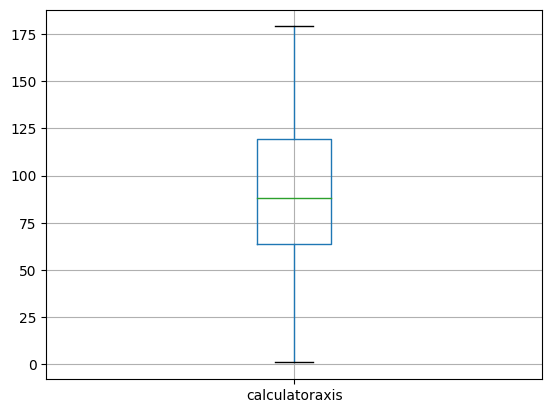

In [12]:
df.boxplot('calculatoraxis')

array([[<Axes: title={'center': 'appmagnitude'}>,
        <Axes: title={'center': 'calculatormagnitude'}>],
       [<Axes: title={'center': 'appaxis'}>,
        <Axes: title={'center': 'calculatoraxis'}>]], dtype=object)

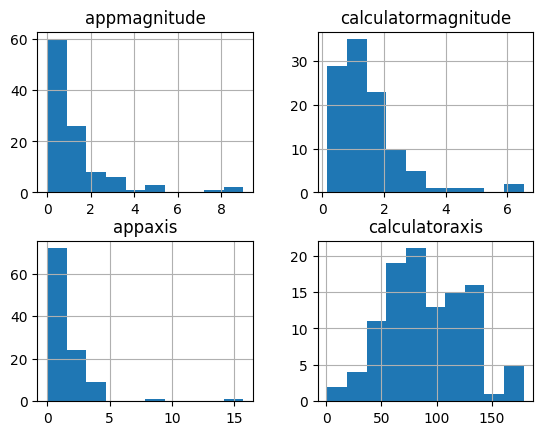

In [13]:
df.hist()

In [14]:
df.corr()

,appmagnitude,calculatormagnitude,appaxis,calculatoraxis
appmagnitude,1.000000,0.377480,0.504570,-0.126856
calculatormagnitude,0.377480,1.000000,0.641810,0.001962
appaxis,0.504570,0.641810,1.000000,-0.076226
calculatoraxis,-0.126856,0.001962,-0.076226,1.000000


<Axes: >

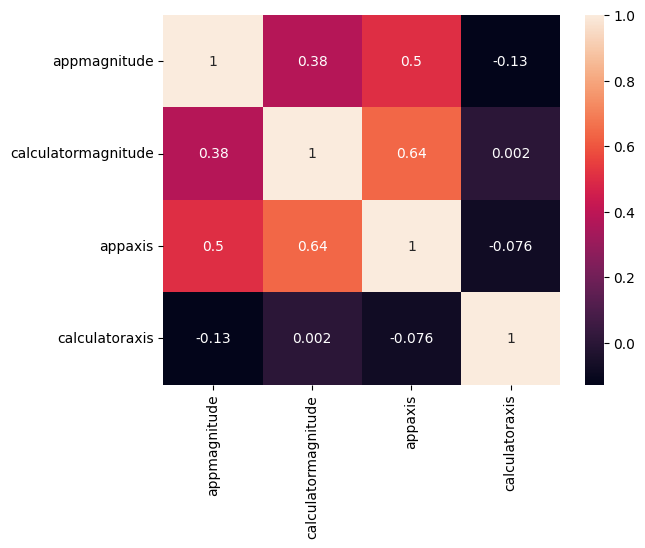

In [15]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, annot=True)

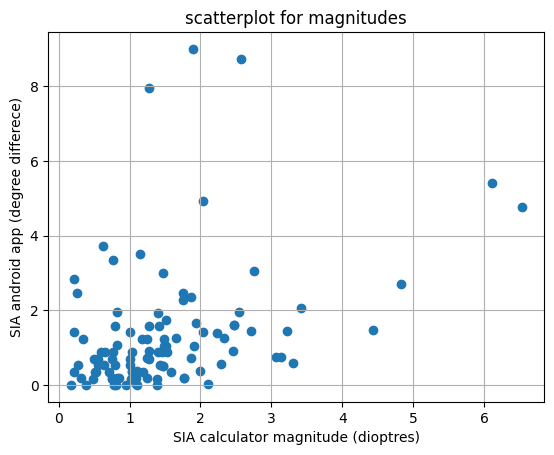

In [21]:
import matplotlib.pyplot as plt
x = df['calculatormagnitude']
y = df['appmagnitude']
plt.title('scatterplot for magnitudes')
plt.xlabel('SIA calculator magnitude (dioptres)')
plt.ylabel('SIA android app (degree differece)')
plt.grid()
plt.scatter(x,y)


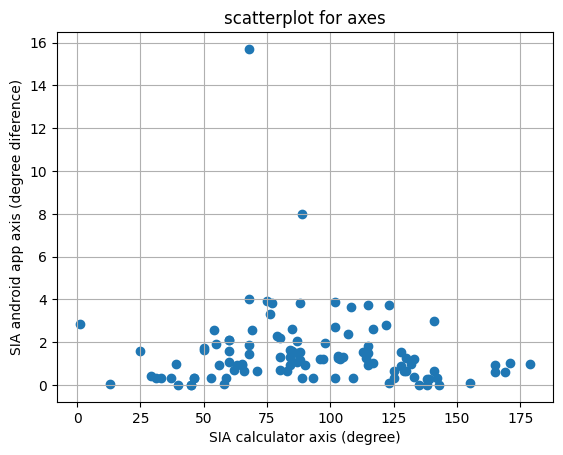

In [22]:
x = df['calculatoraxis']
y = df['appaxis']
plt.title('scatterplot for axes')
plt.xlabel('SIA calculator axis (degree)')
plt.ylabel('SIA android app axis (degree diference)')
plt.grid()
plt.scatter(x,y)

In [23]:
df.columns

Index(['appmagnitude', 'calculatormagnitude', 'appaxis', 'calculatoraxis'], dtype='object')

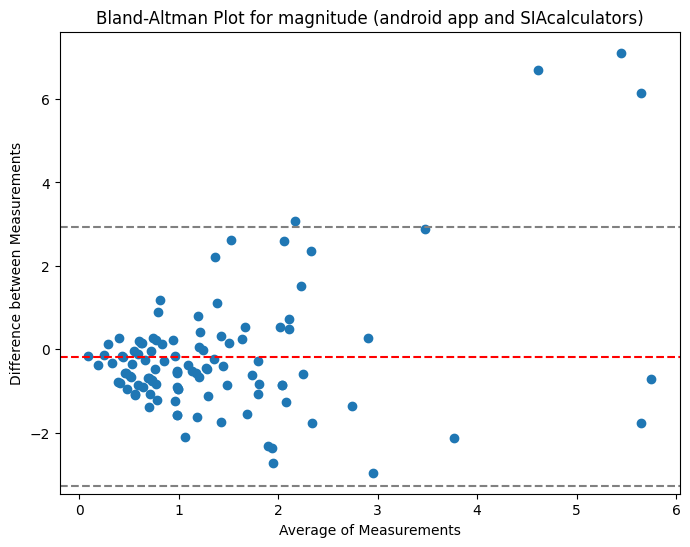

In [24]:
import numpy as np
import matplotlib.pyplot as plt

androidapp = df['appmagnitude']
SIAcalculator = df['calculatormagnitude']

def bland_altman_plot(androidapp, SIAcalculator, *args, **kwargs):
    """
    Bland-Altman plot function.

    androidapp : 1D array-like
        First set of measurements.
    SIAcalculator : 1D array-like
        Second set of measurements.
    """
    androidapp = np.asarray(androidapp)
    SIAcalculator = np.asarray(SIAcalculator)

    # Compute the differences between android app and SIA calculator
    differences = androidapp - SIAcalculator

    # Compute the average of the measurements
    averages = (androidapp + SIAcalculator) / 2.0

    # Create the Bland-Altman plot
    plt.figure(figsize=(8, 6))
    plt.scatter(averages, differences, *args, **kwargs)

    # Add a horizontal line at the mean of the differences
    plt.axhline(differences.mean(), color='red', linestyle='--')

    # Add limits and labels
    mean_difference = differences.mean()
    sd_difference = differences.std()
    plt.title('Bland-Altman Plot for magnitude (android app and SIAcalculators)')
    plt.xlabel('Average of Measurements')
    plt.ylabel('Difference between Measurements')
    plt.axhline(mean_difference + 1.96 * sd_difference, color='gray', linestyle='--')
    plt.axhline(mean_difference - 1.96 * sd_difference, color='gray', linestyle='--')

    # Show plot
    plt.show()

# Plot Bland-Altman plot
bland_altman_plot(androidapp, SIAcalculator)


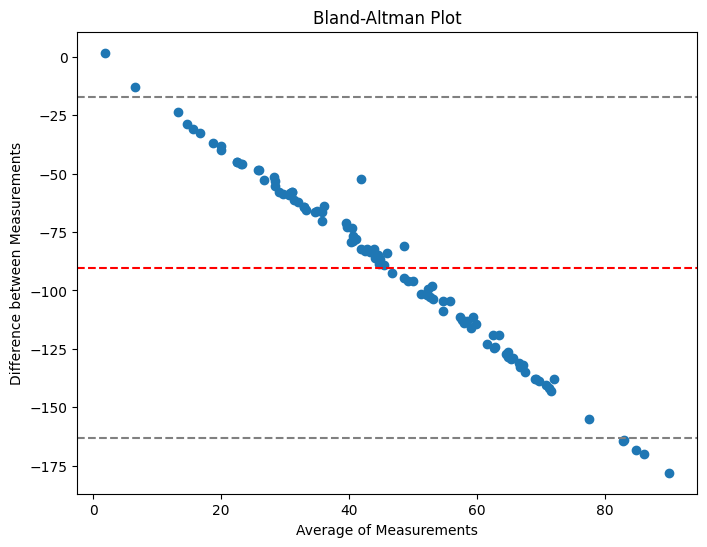

In [26]:
androidappaxis = df['appaxis']
SIAcalculatoraxis = df['calculatoraxis']

def bland_altman_plot(androidappaxis, SIAcalculatoraxis, *args, **kwargs):
    """
    Bland-Altman plot function.

    data1 : 1D array-like
        First set of measurements.
    data2 : 1D array-like
        Second set of measurements.
    """
    androidappaxis = np.asarray(androidappaxis)
    SIAcalculatoraxis = np.asarray(SIAcalculatoraxis)

    # Compute the differences between data1 and data2
    differences = androidappaxis - SIAcalculatoraxis

    # Compute the average of the measurements
    averages = (androidappaxis + SIAcalculatoraxis) / 2.0

    # Create the Bland-Altman plot
    plt.figure(figsize=(8, 6))
    plt.scatter(averages, differences, *args, **kwargs)

    # Add a horizontal line at the mean of the differences
    plt.axhline(differences.mean(), color='red', linestyle='--')

    # Add limits and labels
    mean_difference = differences.mean()
    sd_difference = differences.std()
    plt.title('Bland-Altman Plot')
    plt.xlabel('Average of Measurements')
    plt.ylabel('Difference between Measurements')
    plt.axhline(mean_difference + 1.96 * sd_difference, color='gray', linestyle='--')
    plt.axhline(mean_difference - 1.96 * sd_difference, color='gray', linestyle='--')

    # Show plot
    plt.show()

# Plot Bland-Altman plot
bland_altman_plot(androidappaxis, SIAcalculatoraxis)


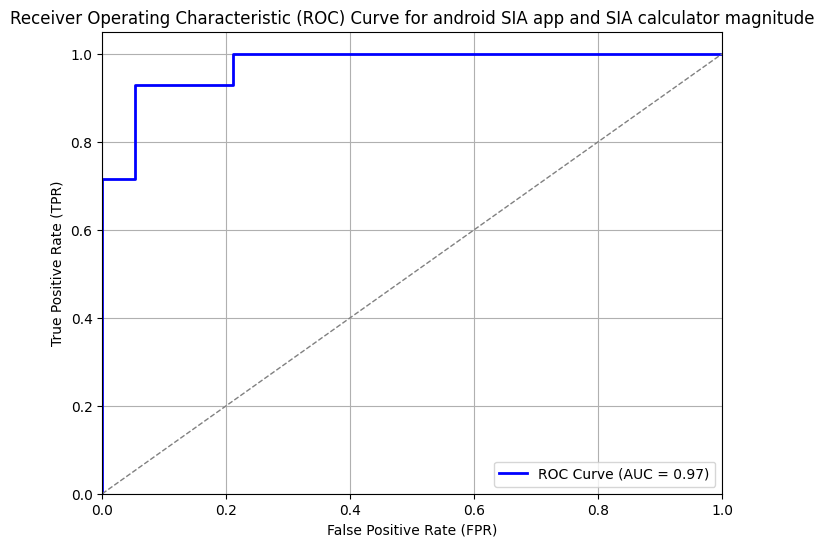

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score


X = df['calculatormagnitude']
y = df['appmagnitude']
X, y = make_classification(n_samples=107,random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities of the positive class (class 1)
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Plot the random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for android SIA app and SIA calculator magnitude')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

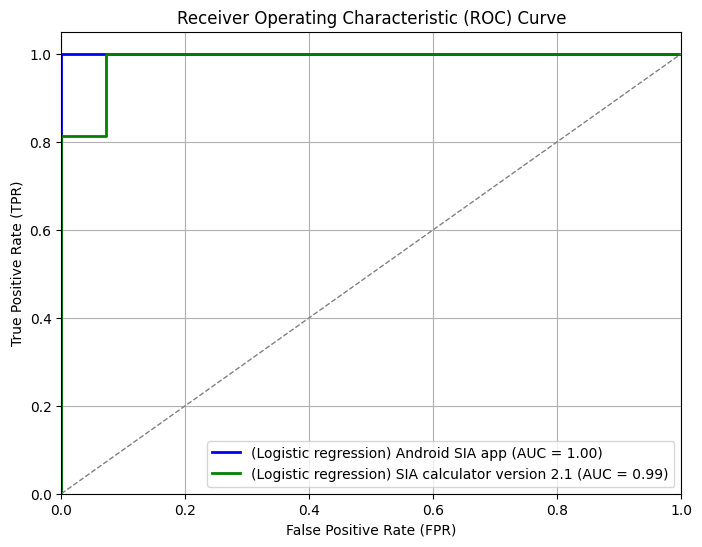

In [28]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

X1 = df['appmagnitude']
y1 = df['appaxis']

X2 = df['calculatormagnitude']
y2 = df['calculatoraxis']

X1, y1 = make_classification(random_state=42)
X2, y2 = make_classification(random_state=42)

# Split android SIA app into train and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

# Split SIA calculator version 2.1 into train and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=24)

# Initialize classifiers for android app and sia calculator
android_SIA_app = LogisticRegression()
SIA_calculator = LogisticRegression()

# Fit classifiers on android app and sia calculator
android_SIA_app.fit(X1_train, y1_train)
SIA_calculator.fit(X2_train, y2_train)

# Predict probabilities of the positive class (class 1) for android app and sia calculator
y1_prob = android_SIA_app.predict_proba(X1_test)[:, 1]
y2_prob = SIA_calculator.predict_proba(X2_test)[:, 1]

# Compute ROC curve and ROC area for android app and sia calculator
fpr1, tpr1, _ = roc_curve(y1_test, y1_prob)
roc_auc1 = roc_auc_score(y1_test, y1_prob)

fpr2, tpr2, _ = roc_curve(y2_test, y2_prob)
roc_auc2 = roc_auc_score(y2_test, y2_prob)

# Plot ROC curves for android app and sia calculator
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='blue', lw=2, label=f'(Logistic regression) Android SIA app (AUC = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, color='green', lw=2, label=f'(Logistic regression) SIA calculator version 2.1 (AUC = {roc_auc2:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Plot the logistic classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [29]:
q1 = df.appmagnitude.quantile(0.25)
q3 = df.appmagnitude.quantile(0.75)

In [30]:
iqr = q3-q1

In [31]:
lowerlimit = q1-1.5*iqr
upperlimit = q3+1.5*iqr

In [39]:
df1 = df[(df.appmagnitude>lowerlimit) & (df.appmagnitude<upperlimit)]
df1.shape

(99, 4)

<Axes: >

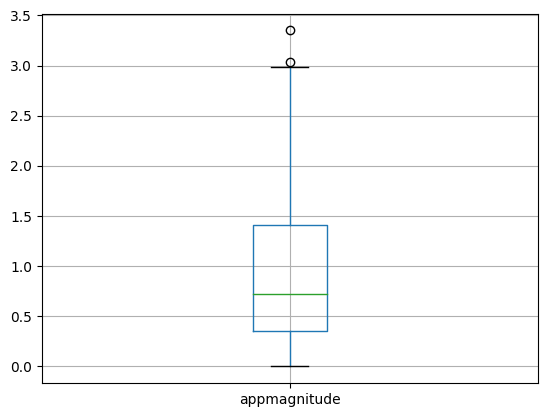

In [33]:
df1.boxplot('appmagnitude')

<Axes: >

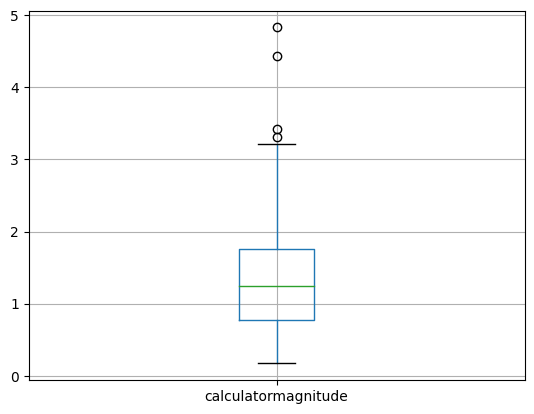

In [34]:
df1.boxplot('calculatormagnitude')

In [35]:
q1df1 = df1.appmagnitude.quantile(0.25)
q3df1 = df1.appmagnitude.quantile(0.75)

In [36]:
iqrdf1 = q3df1-q1df1

In [37]:
lowerlimitdf1 = q1df1-1.5*iqrdf1
upperlimitdf1 = q3df1+1.5*iqrdf1

In [38]:
df2 = df1[(df1.appmagnitude>lowerlimitdf1) & (df1.appmagnitude<upperlimitdf1)]
df2.shape

(97, 4)

<Axes: >

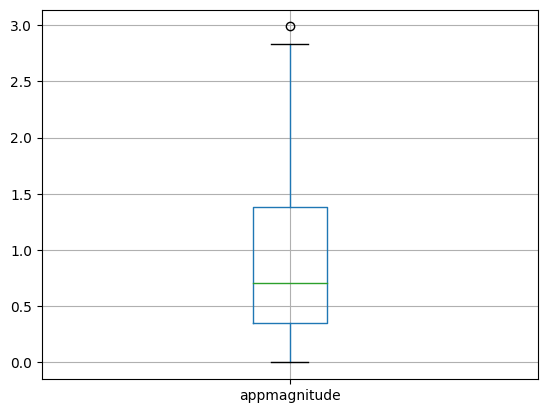

In [40]:
df2.boxplot('appmagnitude')

<Axes: >

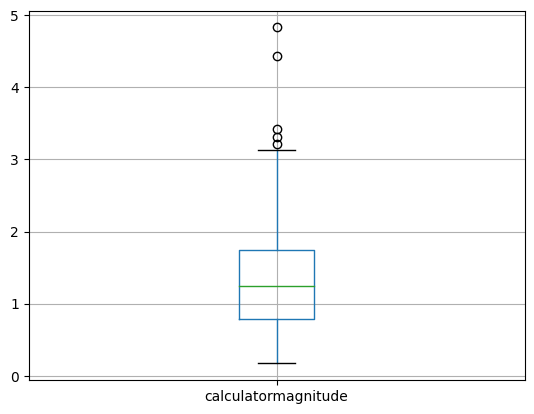

In [41]:
df2.boxplot('calculatormagnitude')

<Axes: >

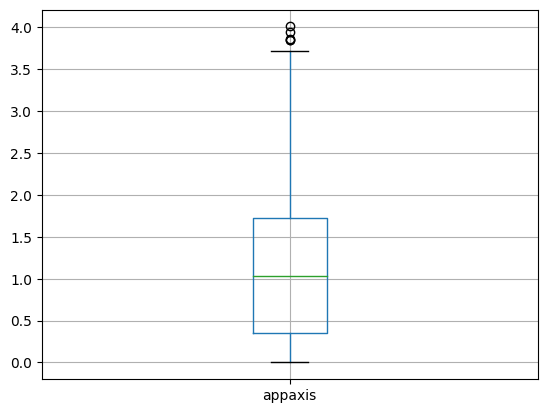

In [42]:
df2.boxplot('appaxis')

<Axes: >

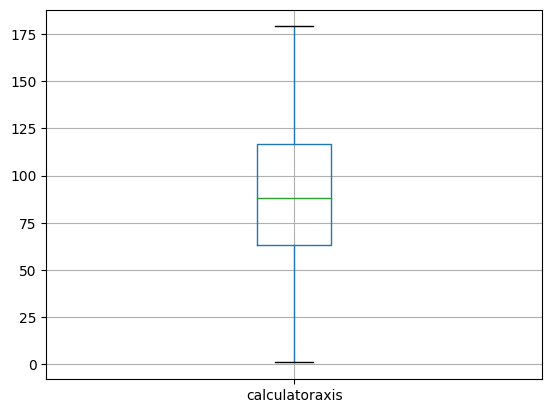

In [43]:
df2.boxplot('calculatoraxis')

In [57]:
q1df2 = df2.calculatormagnitude.quantile(0.25)
q3df2 = df2.calculatormagnitude.quantile(0.75)

In [52]:
iqrdf2 = q3df2-q1df2

In [53]:
lowerlimitdf2 = q1df2-1.5*iqrdf2
upperlimitdf2 = q3df2+1.5*iqrdf2

In [59]:
df3 = df2[(df2.calculatormagnitude>lowerlimitdf2) & (df2.calculatormagnitude<upperlimitdf2)]
df3.shape

(90, 4)

<Axes: >

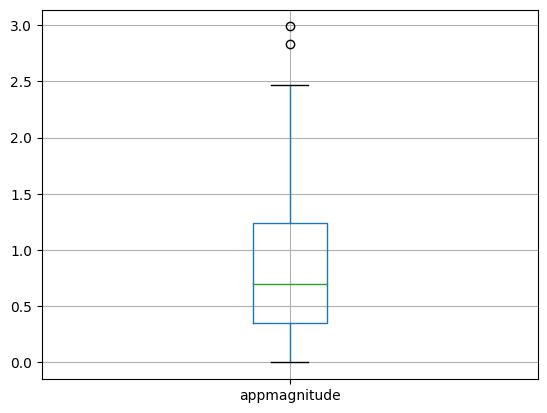

In [60]:
df3.boxplot('appmagnitude')

<Axes: >

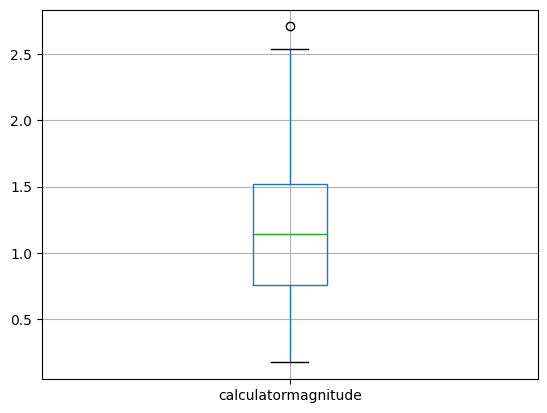

In [61]:
df3.boxplot('calculatormagnitude')

In [64]:
q1df3 = df3.appmagnitude.quantile(0.25)
q3df3 = df3.appmagnitude.quantile(0.75)

In [65]:
iqrdf3 = q3df3-q1df3

In [76]:
lowerlimitdf3 = q1df3-1.5*iqrdf3
upperlimitdf3 = q3df3+1.5*iqrdf3

In [77]:
df4 = df3[(df3.appmagnitude>lowerlimitdf3) & (df3.appmagnitude<upperlimitdf3)]
df4.shape

(88, 4)

<Axes: >

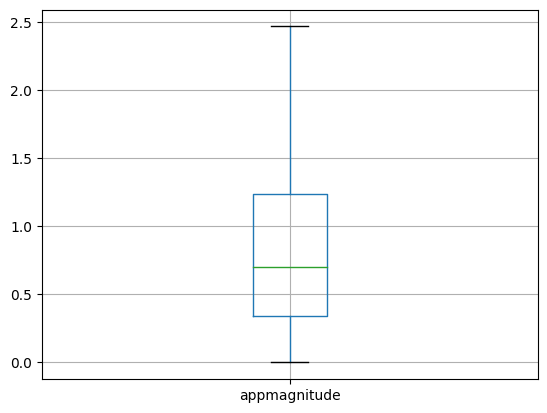

In [78]:
df4.boxplot('appmagnitude')

<Axes: >

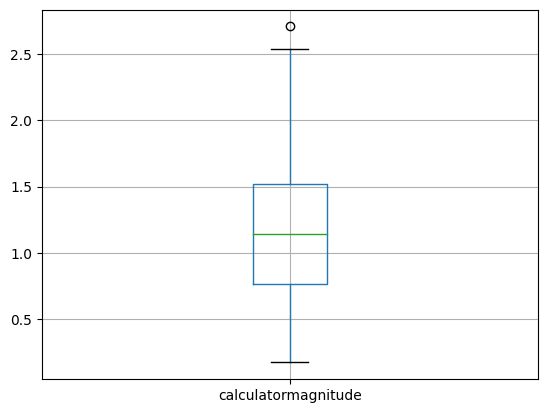

In [79]:
df4.boxplot('calculatormagnitude')

In [80]:
q1df4 = df4.calculatormagnitude.quantile(0.25)
q3df4 = df4.calculatormagnitude.quantile(0.75)

In [81]:
iqrdf4 = q3df4-q1df4

In [82]:
lowerlimitdf4 = q1df4-1.5*iqrdf4
upperlimitdf4 = q3df4+1.5*iqrdf4

In [84]:
df5 = df4[(df4.calculatormagnitude>lowerlimitdf4) & (df4.calculatormagnitude<upperlimitdf4)]
df5.shape

(87, 4)

<Axes: >

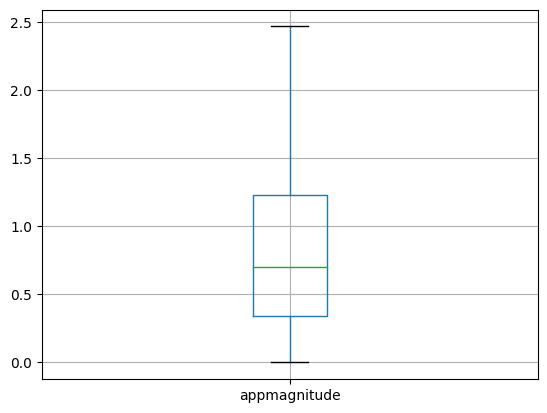

In [85]:
df5.boxplot('appmagnitude')

<Axes: >

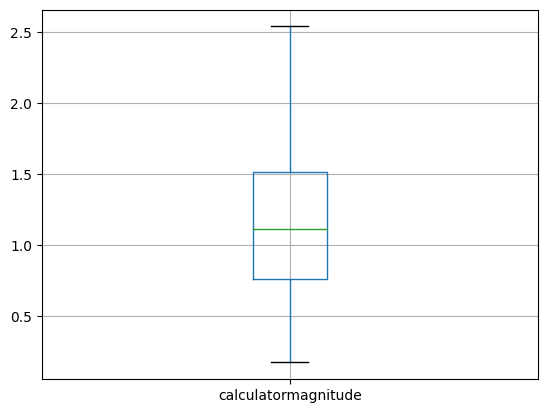

In [86]:
df5.boxplot('calculatormagnitude')

<Axes: >

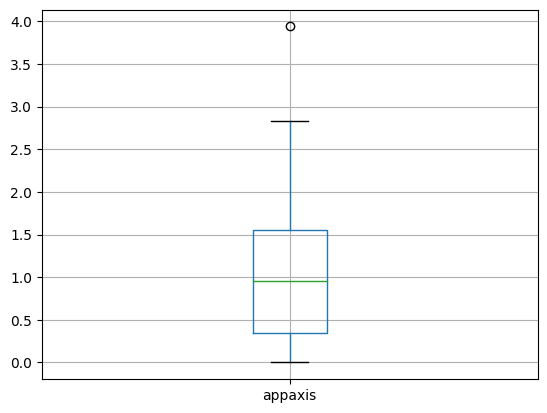

In [87]:
df5.boxplot('appaxis')

<Axes: >

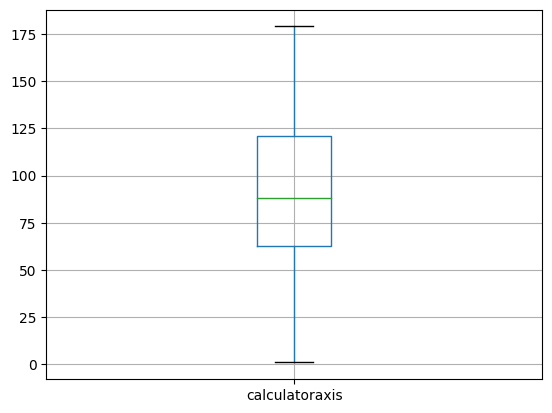

In [88]:
df5.boxplot('calculatoraxis')

In [89]:
q1df5 = df5.appaxis.quantile(0.25)
q3df5 = df5.appaxis.quantile(0.75)

In [90]:
iqrdf5 = q3df5-q1df5

In [91]:
lowerlimitdf5 = q1df5-1.5*iqrdf5
upperlimitdf5 = q3df5+1.5*iqrdf5

In [92]:
df6 = df5[(df5.appaxis>lowerlimitdf5) & (df5.appaxis<upperlimitdf5)]
df6.shape

(86, 4)

<Axes: >

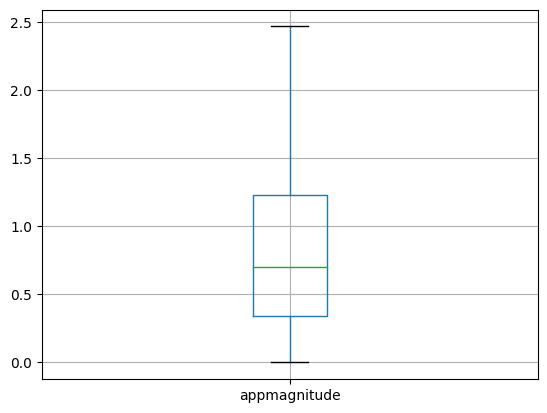

In [93]:
df6.boxplot('appmagnitude')

<Axes: >

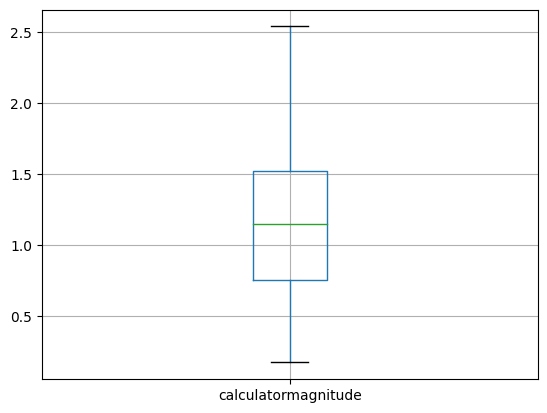

In [94]:
df6.boxplot('calculatormagnitude')

<Axes: >

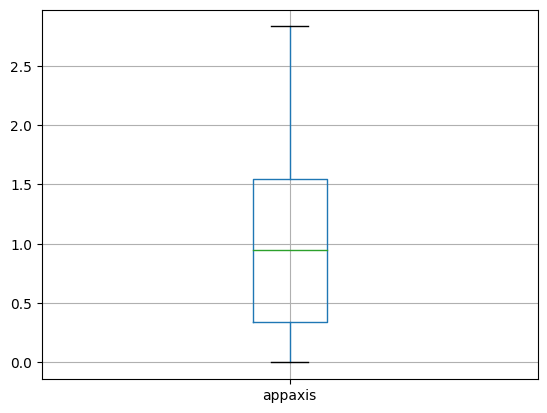

In [95]:
df6.boxplot('appaxis')

<Axes: >

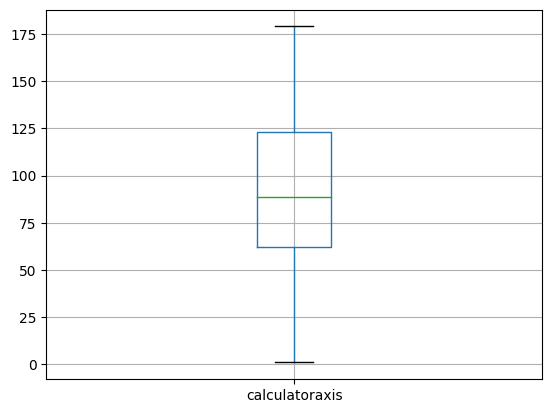

In [96]:
df6.boxplot('calculatoraxis')

<Axes: >

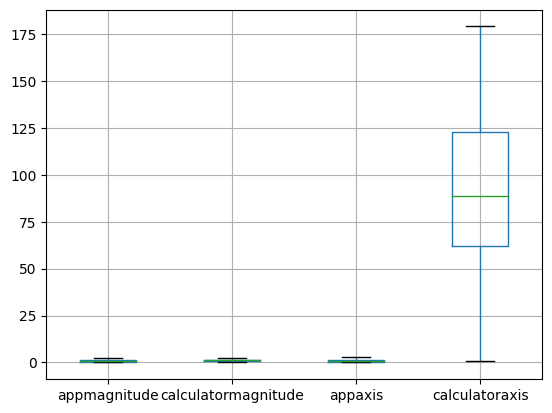

In [97]:
df6.boxplot()

array([[<Axes: title={'center': 'appmagnitude'}>,
        <Axes: title={'center': 'calculatormagnitude'}>],
       [<Axes: title={'center': 'appaxis'}>,
        <Axes: title={'center': 'calculatoraxis'}>]], dtype=object)

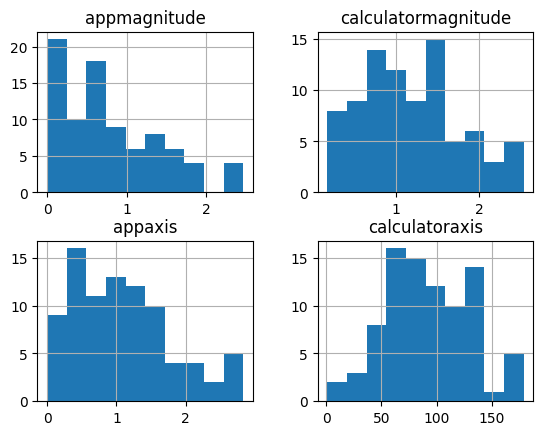

In [98]:
df6.hist()

In [99]:
df6.corr()

,appmagnitude,calculatormagnitude,appaxis,calculatoraxis
appmagnitude,1.000000,0.336996,0.223575,-0.103126
calculatormagnitude,0.336996,1.000000,0.769442,-0.064588
appaxis,0.223575,0.769442,1.000000,-0.109601
calculatoraxis,-0.103126,-0.064588,-0.109601,1.000000


<Axes: >

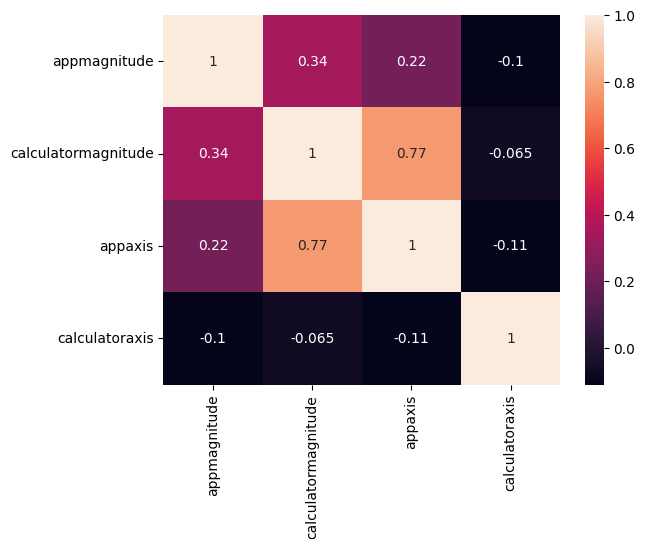

In [101]:
corr = df6.corr()
sns.heatmap(corr, annot=True)

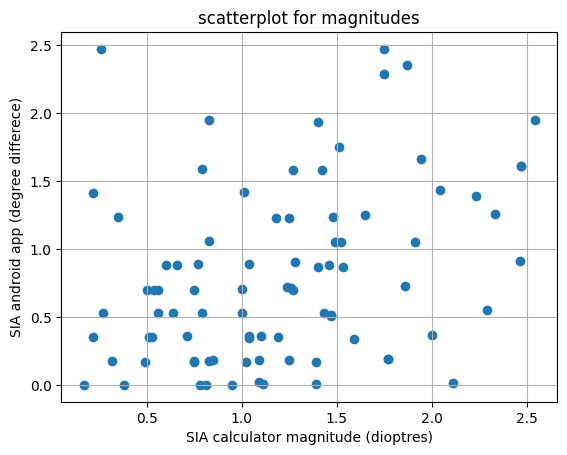

In [102]:
x = df6['calculatormagnitude']
y = df6['appmagnitude']
plt.title('scatterplot for magnitudes')
plt.xlabel('SIA calculator magnitude (dioptres)')
plt.ylabel('SIA android app (degree differece)')
plt.grid()
plt.scatter(x,y)

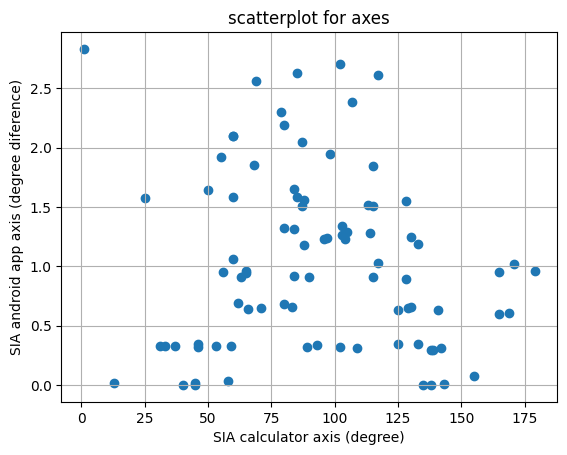

In [103]:
x = df6['calculatoraxis']
y = df6['appaxis']
plt.title('scatterplot for axes')
plt.xlabel('SIA calculator axis (degree)')
plt.ylabel('SIA android app axis (degree diference)')
plt.grid()
plt.scatter(x,y)

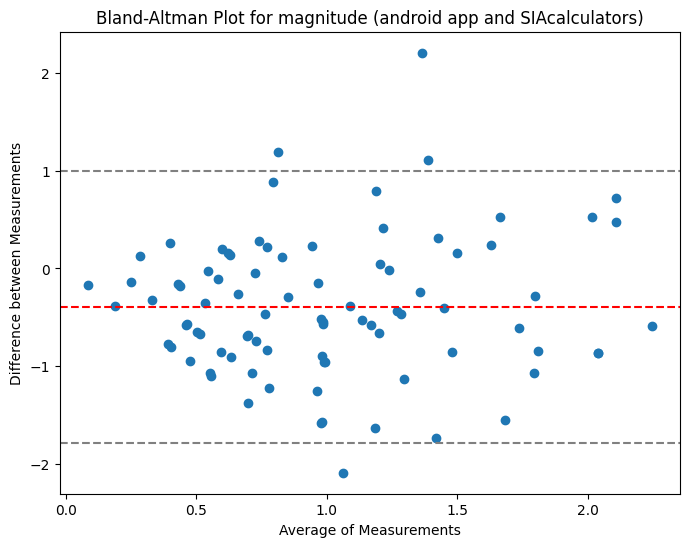

In [104]:
import numpy as np
import matplotlib.pyplot as plt

androidapp = df6['appmagnitude']
SIAcalculator = df6['calculatormagnitude']

def bland_altman_plot(androidapp, SIAcalculator, *args, **kwargs):
    """
    Bland-Altman plot function.

    androidapp : 1D array-like
        First set of measurements.
    SIAcalculator : 1D array-like
        Second set of measurements.
    """
    androidapp = np.asarray(androidapp)
    SIAcalculator = np.asarray(SIAcalculator)

    # Compute the differences between android app and SIA calculator
    differences = androidapp - SIAcalculator

    # Compute the average of the measurements
    averages = (androidapp + SIAcalculator) / 2.0

    # Create the Bland-Altman plot
    plt.figure(figsize=(8, 6))
    plt.scatter(averages, differences, *args, **kwargs)

    # Add a horizontal line at the mean of the differences
    plt.axhline(differences.mean(), color='red', linestyle='--')
     # Add limits and labels
    mean_difference = differences.mean()
    sd_difference = differences.std()
    plt.title('Bland-Altman Plot for magnitude (android app and SIAcalculators)')
    plt.xlabel('Average of Measurements')
    plt.ylabel('Difference between Measurements')
    plt.axhline(mean_difference + 1.96 * sd_difference, color='gray', linestyle='--')
    plt.axhline(mean_difference - 1.96 * sd_difference, color='gray', linestyle='--')

    # Show plot
    plt.show()

# Plot Bland-Altman plot
bland_altman_plot(androidapp, SIAcalculator)

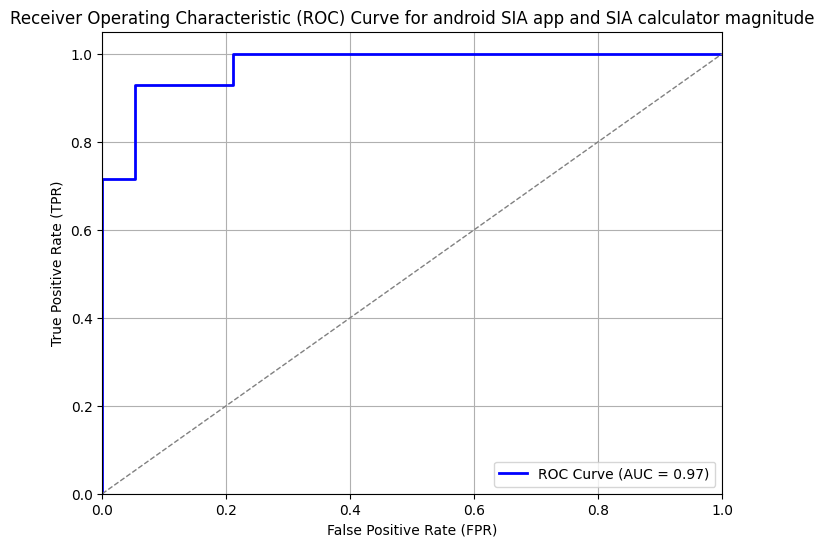

In [105]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score


X = df6['calculatormagnitude']
y = df6['appmagnitude']
X, y = make_classification(n_samples=107,random_state=42)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Fit a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities of the positive class (class 1)
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Plot the random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve for android SIA app and SIA calculator magnitude')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

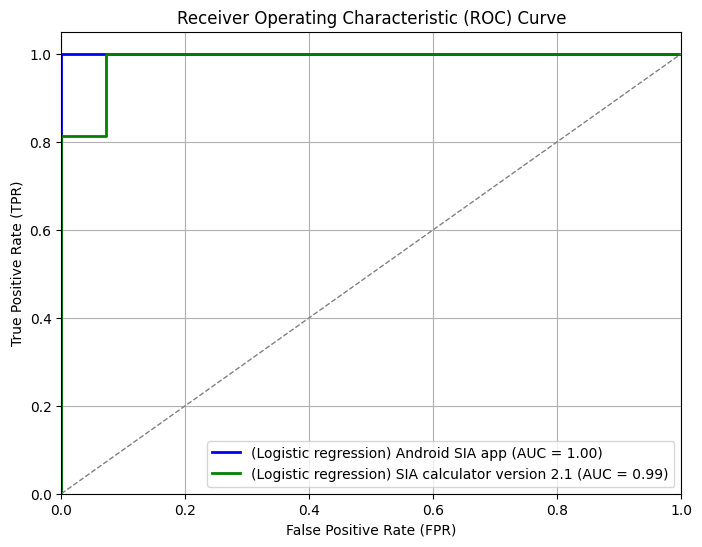

In [106]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

X1 = df6['appmagnitude']
y1 = df6['appaxis']

X2 = df6['calculatormagnitude']
y2 = df6['calculatoraxis']

X1, y1 = make_classification(random_state=42)
X2, y2 = make_classification(random_state=42)

# Split android SIA app into train and test sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

# Split SIA calculator version 2.1 into train and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=24)

# Initialize classifiers for android app and sia calculator
android_SIA_app = LogisticRegression()
SIA_calculator = LogisticRegression()

# Fit classifiers on android app and sia calculator
android_SIA_app.fit(X1_train, y1_train)
SIA_calculator.fit(X2_train, y2_train)

# Predict probabilities of the positive class (class 1) for android app and sia calculator
y1_prob = android_SIA_app.predict_proba(X1_test)[:, 1]
y2_prob = SIA_calculator.predict_proba(X2_test)[:, 1]
# Compute ROC curve and ROC area for android app and sia calculator
fpr1, tpr1, _ = roc_curve(y1_test, y1_prob)
roc_auc1 = roc_auc_score(y1_test, y1_prob)

fpr2, tpr2, _ = roc_curve(y2_test, y2_prob)
roc_auc2 = roc_auc_score(y2_test, y2_prob)

# Plot ROC curves for android app and sia calculator
plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, color='blue', lw=2, label=f'(Logistic regression) Android SIA app (AUC = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, color='green', lw=2, label=f'(Logistic regression) SIA calculator version 2.1 (AUC = {roc_auc2:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1)  # Plot the logistic classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()